In [1]:
#Testing Pyspark Installation
import findspark
findspark.init()
import pyspark

## Initializing PySpark

In [2]:
#intialize Spark Context
#from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
spark= SparkSession.builder.appName('Quanitative').getOrCreate()
spark

## importing Libraries

In [3]:
from pyspark.sql import *
from pyspark.sql.types import *
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
intern=pd.read_csv('/Users/Asus/Documents/InternCsv/InternCsvfinal_dispatch(Act).csv')  
#segregating excel files from the Given Data

In [5]:
intern.shape

(46464, 5)

In [6]:
intern.columns

Index(['Unnamed: 0', 'Plant', 'Date', 'Time', 'Dispatch'], dtype='object')

In [7]:
intern.fillna(0,inplace=True)

In [8]:
intern = intern.rename(columns={'Unnamed: 0': 'Index'}, index={'ONE': 'Row_1'})
intern.head(4)

,Index,Plant,Date,Time,Dispatch
0,0,Canyon,7/1/2020,0:00,20
1,1,WPS,7/1/2020,0:00,0
2,2,Olax,7/1/2020,0:00,10
3,3,Nlax,7/1/2020,0:00,39


In [9]:
intern.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46464 entries, 0 to 46463
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Index     46464 non-null  int64 
 1   Plant     46464 non-null  object
 2   Date      46464 non-null  object
 3   Time      46464 non-null  object
 4   Dispatch  46464 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.1+ MB


In [10]:
intern.isnull().sum()

Index       0
Plant       0
Date        0
Time        0
Dispatch    0
dtype: int64

In [11]:
intern["Plant"].value_counts()

Kukule            1296
KCCP              1296
Canyon            1296
ALTAQQA-Mahi.     1296
Olax              1296
Vict              1296
Uthuru Janani     1296
Sam               1296
Uku               1296
Koth              1296
VPOWER Palle.     1296
KPS(GT7)          1296
Barge             1296
Asia Power        1296
ACE Matara        1296
WCP               1296
KPS(GT)           1296
Sapu B            1296
Rant              1296
Bowa              1296
LVPS 1            1296
Nlax              1296
ACE EMBP          1296
CEB Sup Power     1296
Rand              1296
VPOWER Hamb.      1296
WPS               1296
ALTAQQA-Pol.      1296
Sojitz CCP        1296
LVPS 2            1296
LVPS 3            1296
VPOWER Horona     1296
Upper Kothmale    1296
Polp              1296
Sapu A            1296
VPOWER Galle      1104
Name: Plant, dtype: int64

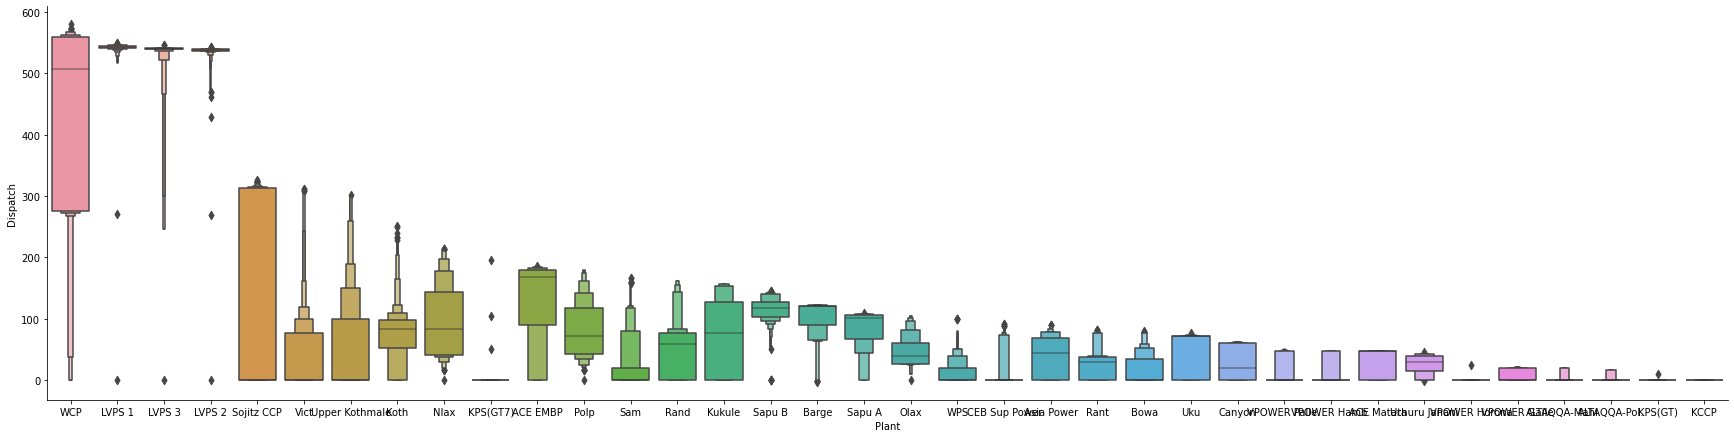

In [12]:
# From graph we can see that Plants Dispatches in July

# Plant vs Dispatch
sns.catplot(y = "Dispatch", x = "Plant", data = intern.sort_values("Dispatch", ascending = False), kind="boxen", height = 6, aspect = 4)
plt.show(10)

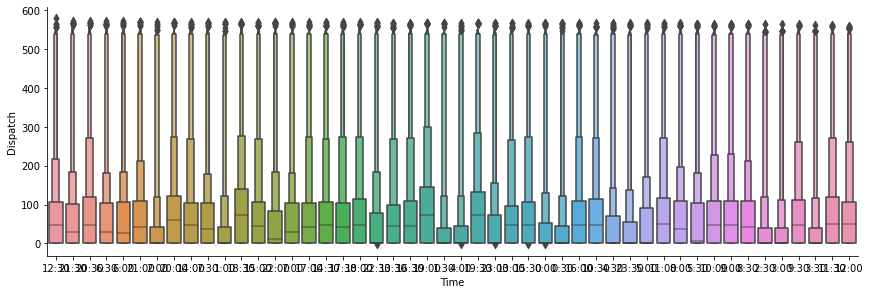

In [13]:
# Time vs Dispatch

sns.catplot(y = "Dispatch", x = "Time", data = intern.sort_values("Dispatch", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

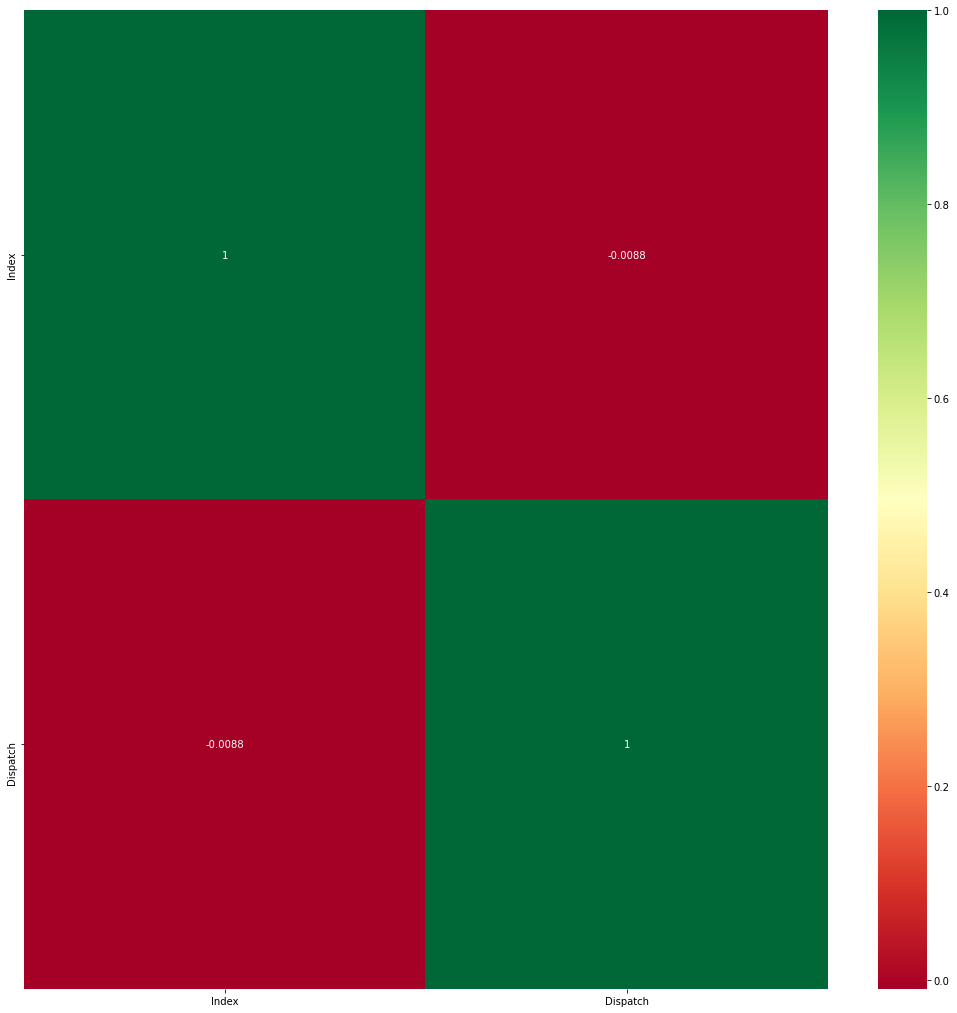

In [14]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(intern.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [15]:
X = intern.loc[:, 'Date']
X.head(4)

0    7/1/2020
1    7/1/2020
2    7/1/2020
3    7/1/2020
Name: Date, dtype: object

In [16]:
y = intern.iloc[:,4]
y.head(4)

0    20
1     0
2    10
3    39
Name: Dispatch, dtype: int64

In [17]:
from datetime import datetime

In [18]:
intern['Date'] = pd.to_datetime(intern['Date']).dt.date

In [19]:
intern.dtypes


Index        int64
Plant       object
Date        object
Time        object
Dispatch     int64
dtype: object

In [20]:
intern['Date'] = pd.to_datetime(intern['Date'])

In [21]:
from datetime import datetime
intern.dtypes

Index                int64
Plant               object
Date        datetime64[ns]
Time                object
Dispatch             int64
dtype: object

In [22]:
df_spark = spark.createDataFrame(intern)
df_spark.show()

+-----+--------------+-------------------+----+--------+
|Index|         Plant|               Date|Time|Dispatch|
+-----+--------------+-------------------+----+--------+
|    0|        Canyon|2020-07-01 00:00:00|0:00|      20|
|    1|           WPS|2020-07-01 00:00:00|0:00|       0|
|    2|          Olax|2020-07-01 00:00:00|0:00|      10|
|    3|          Nlax|2020-07-01 00:00:00|0:00|      39|
|    4|          Polp|2020-07-01 00:00:00|0:00|      39|
|    5|Upper Kothmale|2020-07-01 00:00:00|0:00|       0|
|    6|          Koth|2020-07-01 00:00:00|0:00|      87|
|    7|          Vict|2020-07-01 00:00:00|0:00|       0|
|    8|          Rand|2020-07-01 00:00:00|0:00|       0|
|    9|          Rant|2020-07-01 00:00:00|0:00|       0|
|   10|           Uku|2020-07-01 00:00:00|0:00|      72|
|   11|          Bowa|2020-07-01 00:00:00|0:00|       0|
|   12|           Sam|2020-07-01 00:00:00|0:00|       0|
|   13|        Kukule|2020-07-01 00:00:00|0:00|     104|
|   14|        LVPS 1|2020-07-0